# Assignment 3 - Part 2: Classification and Grid Search (33 marks)
### Due Date: Monday, March 6 at 11:59pm

Author: *Hetalben Virani*

In [ ]:
!pip install --upgrade scikit-learn==1.1.0
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The purpose of this portion of the assignment is to practice following the grid-search workflow: 
- Split data into training and test set
- Use the training portion to find the best model using grid search and cross-validation
- Retrain the best model
- Evaluate the retrained model on the test set

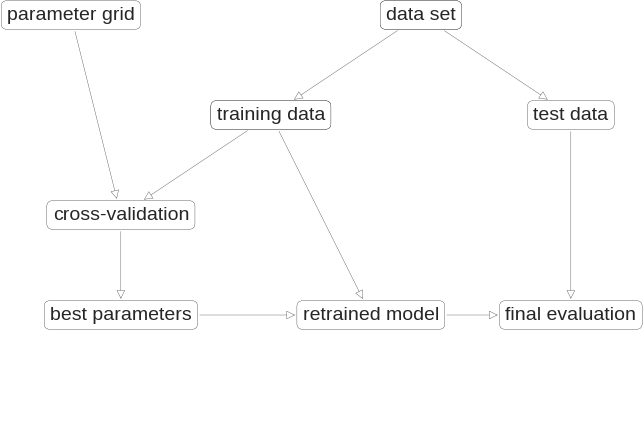

In [ ]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions (2 marks)

In [ ]:
from sklearn.model_selection import cross_validate

def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
     #TODO: Implement function body
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, return_train_score=True)
    return np.mean(scores["train_score"]), np.mean(scores["test_score"])

In [ ]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))

In [ ]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [ ]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

## 1. Load data (2 marks)
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`

Print shape and type of `X`, `y`

In [ ]:
# TODO: Add data loading code - similar to Assignment 2
from yellowbrick.datasets import load_mushroom
X, y = load_mushroom()
X.shape, y.shape

((8123, 3), (8123,))

## 2. Preprocessing (4 marks)
In this dataset, all features are discrete and nominal and need to be encoded. We will use a `OneHotEncoder`

The target vector is discrete and nominal as well and contains string labels. While sklearn is OK using string labels in target vectors, you will use a `LabelEncoder` explicitly to convert strings to integers and keep the encoder to translate between the two representations

### 2.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a varible `X_enc`. Use `sparse=False`. Print shape of `X_enc`

In [ ]:
# TODO: Add OneHotEncoder here
from sklearn.preprocessing import OneHotEncoder
oneHotEnc = OneHotEncoder(sparse=False)
X_enc = oneHotEnc.fit_transform(X)
print(X_enc.shape)

(8123, 20)


### 2.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a varibale `y_enc`

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object

In [ ]:
# TODO: Add LabelEncoder here
from sklearn.preprocessing import LabelEncoder
lbEncoder = LabelEncoder()
y_enc = lbEncoder.fit_transform(y)
print(y_enc)
print(lbEncoder.classes_)

[0 0 1 ... 0 1 0]
['edible' 'poisonous']


## 3. Create training and test sets (1 mark)
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets

In [ ]:
# TODO: Add train_test_split() here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (4 marks)
Create a list containing `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- Compute the **f1 score** using `get_classifier_cv_score()` with the 7-fold cross-validation defined above
- Compute the **f1 score** using `X_train` and `y_train` as arguments
- Print the models' training and validation scores with **3 decimal places**

In [ ]:
# TODO: Add cross-validation comparison here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = [
    LogisticRegression(),
    SVC(),
    BernoulliNB(),
    RandomForestClassifier(random_state=55),
    GradientBoostingClassifier(random_state=56)
]

for model in models:
    train_score, test_score = get_classifier_cv_score(model, X_train, y_train, scoring="f1")
    print(f"Model: {type(model).__name__},\t\t Training F1 Score: {train_score:.3f}, Test F1 Score: {test_score:.3f}")
# TODO

Model: LogisticRegression,		 Training F1 Score: 0.663, Test F1 Score: 0.664
Model: SVC,		 Training F1 Score: 0.691, Test F1 Score: 0.678
Model: BernoulliNB,		 Training F1 Score: 0.614, Test F1 Score: 0.613
Model: RandomForestClassifier,		 Training F1 Score: 0.692, Test F1 Score: 0.678
Model: GradientBoostingClassifier,		 Training F1 Score: 0.702, Test F1 Score: 0.692


## 5. Hyperparameter tuning using grid search (8 marks)

The inital cross-validation above gives us an idea of how algorithms perfom using their default hyperparameters

Next, we will try and improve one model by tuning its hyperparameters using grid search

### 5.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(n_estimators=300, random_state=55)`:

- Set the number of trees `n_estimators=300` for all evaluations
- Grid search using 7-fold cross-validation and `f1` as the scoring function 
- Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores  or -1 works well

Use the following hyperparameters and values:
- `'max_depth': [3, 5, 8]`
- `'max_features': [0.3, 0.5, 0.7, 0.9]`

From sklearn help:
> - max_depth: The maximum depth of the tree
> - max_features: If float, then max_features is a fraction and max(1, int(max_features * n_features)) features are considered at each split


Use the `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results

In [ ]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV

rfC = RandomForestClassifier(n_estimators=300, random_state=55)
scoring = "f1"
parameters = {
    'max_depth': [3, 5, 8],
    'max_features': [0.3, 0.5, 0.7, 0.9]
}

cv_splits = 7
n_jobs = -1

clf = GridSearchCV(rfC, parameters, scoring=scoring, n_jobs=n_jobs, cv=cv_splits, return_train_score=True)

In [ ]:
# TODO: Perform the grid search by calling fit() with X_train and y_train
clf.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=55),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'max_features': [0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='f1')

In [ ]:
# TODO: Call print_grid_search_result() to print the results
print_grid_search_result(clf)

{'max_depth': 5, 'max_features': 0.7}
training score= 0.719; validation score=0.716


### *Question 1:* What is the validation score of the best model? Which models in Section 4 does it outperform?

The best model does outperform all of the models mentioned in Section 4

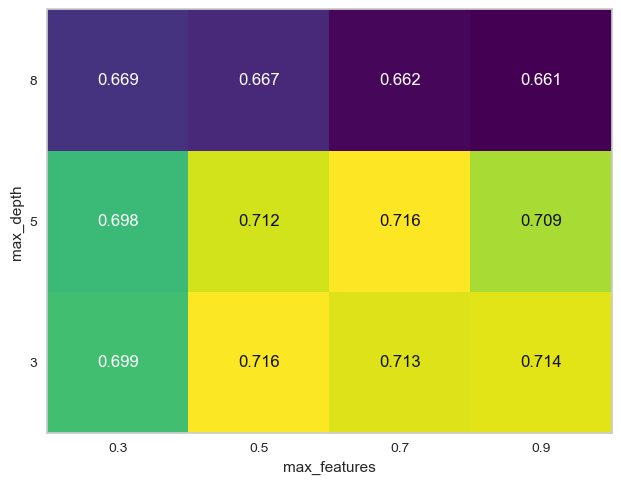

In [ ]:
# TODO: Call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(clf)

### *Question 2:* Where in the hyperparameter ranges does the maximum occur? Would you need to adjust the hyperparameter ranges to find a better model?

I believe we should look for better models more often when max depth = 3-5 and max features are 0.5-0.7 because it seems like those conditions greatly improve model performance.

## 6. Re-train best model (2 marks)
Re-train the best `RandomForestClassifier()` from the grid search above on the training dataset `X_train` and `y_train`

In [ ]:
#TDOD: Re-train best random forest classifier
rfClassifier = RandomForestClassifier(n_estimators=300, random_state=55, max_depth=3, max_features=0.5)
rfClassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=0.5, n_estimators=300,
                       random_state=55)

## 7. Evaluate using test data (4 marks)

Using the retrained model and the test dataset `X_test` and `y_test`:
- plot the confusion matrix using the `plot_confusion_matrix()` function defined above
- print the classification report

Make sure the plot has class labels and a title

### 7.1 Confusion matrix and classification report

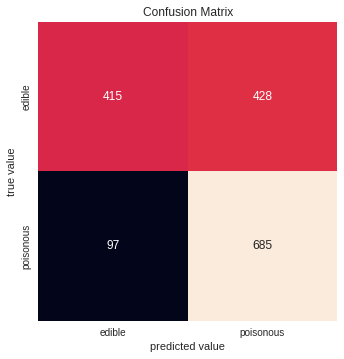

In [ ]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels
y_pred = rfClassifier.predict(X_test)
plot_confusion_matrix(y_test, y_pred, lbEncoder.classes_, "Confusion Matrix")

### 7.2 Classification report

In [ ]:
#TODO: print classification report using default threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=lbEncoder.classes_))

              precision    recall  f1-score   support

      edible       0.81      0.49      0.61       843
   poisonous       0.62      0.88      0.72       782

    accuracy                           0.68      1625
   macro avg       0.71      0.68      0.67      1625
weighted avg       0.72      0.68      0.67      1625



### *Question 3:* What are the precision, recall and accuracy for the positive class on the test set?

Measures like precision, recall, and accuracy are frequently used in machine learning to evaluate how well a classifier performs on a particular job. You need both the test set's true labels and the classifier's predictions on the test set in order to compute these metrics.

### *Question 4:* How many false negatives and false positives does the model produce on the test set?

False Positive = 428 and False Negative = 97

We must contrast the model's predictions with the test set's true labels in order to assess how many false negatives and false positives were produced by the test set.

False negatives occur when the model predicts a negative outcome but the actual label is positive.

False positives occur when a model predicts a positive outcome when the actual label is negative.

## 8. Conclusion (4 marks)

In conclusion, comment on the following items and use data to support your findings:
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?
1. In the classification of edible vs poisonous mushrooms, why is high recall desired?
1. Reflect on the usefulness of this model if it would be put into production and propose ways to improve the model and/or application

1) When classifying mushrooms as either edible or harmful,

A false positive prediction is when the model incorrectly assumed that a mushroom was toxic when it was actually edible.

A mushroom that was actually edible was projected by the model to be poisonous, which is known as a false negative prediction.

2) In this classification task, high recall is preferred because a false positive is preferable to a false negative.

3) If this model were to go into production, it may be helpful for spotting potentially harmful mushrooms and shielding consumers from injury.

More characteristics are required for better outcomes.
The edibility may change depending on the areas or varieties.
No model can accurately predict a mushroom's edibility.

## 9. Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

This assignment covers a wide range of crucial subjects, including model choice, hyperparameter tuning, and model evaluation. (Much scope for learning)

Working with real-world data is beneficial.

The features are difficult to encode.
It's intriguing and challenging to use the cross validation technique to evaluate the performance of several models in an effort to improve performance.
